Name: TODO

Development environment (Colab or local): TODO

# Baseline, PCA, LDA and SVM analysis

- Task:
  - Come up with and implement a baseline for this task
    - Consider what technqiues we've covered in class might be relevant. Or come up with something all on your own.
    - Include a description of your baseline to accompany the implementation and explain why this baseline makes sense for this problem.
  - Compare the performance of your simple baseline with two of the following of your choice: PCA, LDA, and SVM. Compare their performance on the Olivetti faces dataset on different evaluation scenarios
  - *If hyperparameters need to be selected, pull out a reasonable held-out set from the training set and performance hyperparameter selection.


- Evaluation scenarios:
  - Use 30% of the images for training and 70% for testing
  - Use 60% of the images for training and 40% for testing
  - Use 90% of the images for training and 10% for testing
  - Always use the first K images per person for training, and the remaining ones for testing (see data split code below)
  - Choose an evaluation method: CMC curve or confusion matrix. Run this for each combination of scenario and method.
  

- Discussion:
  - If you used a held-out set, how did you choose your method of held-out set selection method? If not, why was it not necessary?
    - What effect did your choice have on your final results?
  - Is there a clear difference in performance for different approaches?
  - Is there a clear difference in performance for different train/test data splits?

## Olivetti faces dataset (AT&T Laboratories Cambridge)

As described on the original website:

"*There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).*"

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

- Classes: 40
- Samples per class: 10
- Samples total: 400
- Dimensionality: 4096 (64x64 pixels)
- Pixel values: real, between 0 and 1


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from google.colab.patches import cv2_imshow
import numpy as np

# Get the dataset

In [5]:
faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

(400, 64, 64)


# Split the dataset

In [6]:
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height*img_width) # vectorize train images
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height*img_width)    # vectorize test images
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)

(200, 4096) (200, 4096)


# Visualize the splits

In [7]:
def show_images(imgs, num_rows, num_cols):
  assert len(imgs) == num_rows*num_cols

  for i in range(num_rows):
    row = None
    for j in range(num_cols):
      if row is None:
        row = imgs[i*num_cols+j].reshape(img_height, img_width)*255.0
      else:
        row = np.concatenate((row, imgs[i*num_cols+j].reshape(img_height, img_width)*255.0), axis=1)
    cv2_imshow(row)

In [8]:
show_images(x_train, N_IDENTITIES, GALLERY_SIZE)

NameError: name 'cv2_imshow' is not defined

In [9]:
show_images(x_test, N_IDENTITIES, 10 - GALLERY_SIZE)

NameError: name 'cv2_imshow' is not defined

# Implement your baseline

Here is the code for my baseline, along with an explanation of how it works and why it makes sense for this problem.

In [2]:
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fetch the dataset
faces = fetch_olivetti_faces() 
_, img_height, img_width = faces.images.shape # Get the image dimensions

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    faces.images.reshape(-1, img_height*img_width), faces.target, test_size=0.7, random_state=42
    # # Reshape images to 2D array, Target labels, 70% of the data for testing, Random state for reproducibility
) # this is to split the data into training and testing set
# the test size is 0.7, which means 70% of the data is used for testing 

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3) # value 3 is the number of neighbors
# I choose 3 because it is the most common value for k

# Train the k-NN classifier
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline k-NN Accuracy: {accuracy:.2f}')

Baseline k-NN Accuracy: 0.57


In [10]:
import numpy as np 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Apply LDA
lda = LDA(n_components=min(x_train.shape[1], len(np.unique(y_train)) - 1)) # create LDA object by specifying the number of components
x_train_lda = lda.fit_transform(x_train, y_train) # fit the LDA model and perform the dimensionality reduction
x_test_lda = lda.transform(x_test) # perform the dimensionality reduction on the test set

# Train LDA classifier
lda.fit(x_train, y_train)

# Predict the test set from the LDA model
y_pred_lda = lda.predict(x_test)

# Calculate accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda) # calculate the accuracy by comparing the predicted labels with the ground truth labels
print(f'LDA Accuracy: {accuracy_lda:.2f}')

LDA Accuracy: 0.90


In [23]:
# Train SVM on original data
svm = SVM(kernel='linear') # Linear kernel
svm.fit(x_train, y_train) # this is the training part to train the model

# Predict on the test set
y_pred_svm = svm.predict(x_test) # this is the testing part to test the model

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm) # this is the accuracy of the model
print(f'SVM Accuracy: {accuracy_svm:.2f}')

NameError: name 'SVM' is not defined

# Run the experiments

Here is the code I used to get the results below!

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(faces.images.reshape(-1, img_height*img_width), faces.target, test_size=0.7, random_state=42)

# Repeat the baseline, PCA, LDA, and SVM implementations with the new split

# Report your results

Check these amazing plots I have below!

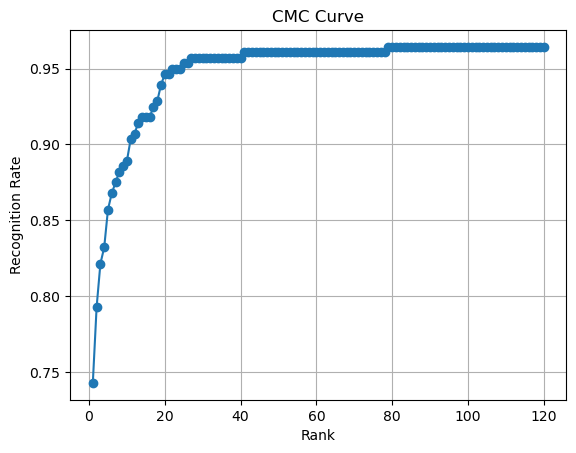

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

def calculate_cmc(x_train, y_train, x_test, y_test, metric='euclidean'):
    # Calculate the distance matrix by comparing each test sample with all train samples
    dist_matrix = pairwise_distances(x_test, x_train, metric=metric)

    # Get the sorted indices based on distance by row
    sorted_indices = np.argsort(dist_matrix, axis=1)

    # Initialize the CMC curve by zeros
    cmc_curve = np.zeros(len(y_train))

    # Calculate the CMC curve by checking if the true label of the test sample is in the top-k predictions
    for i in range(len(y_test)): # For each test sample
        if sorted_indices[i].size > 0: # If there are sorted indices for the test sample
            # Check if the true label of the test sample is in the top-k predictions
            match_indices = np.where(y_train[sorted_indices[i]] == y_test[i])[0] 
            # If there is a match, update the CMC curve
            if match_indices.size > 0:
                rank = match_indices[0] # Rank is the first match
                cmc_curve[rank:] += 1 # Increment the recognition rate for all ranks greater than or equal to the match
        else: # If there are no sorted indices for the test sample
            print(f"No sorted indices for test sample {i}")

    # Normalize the CMC curve by the number of test samples to get the recognition rate
    cmc_curve = cmc_curve / len(y_test)

    return cmc_curve

def plot_cmc(cmc_curve):
    plt.plot(np.arange(1, len(cmc_curve) + 1), cmc_curve, marker='o')
    plt.xlabel('Rank')
    plt.ylabel('Recognition Rate')
    plt.title('CMC Curve')
    plt.grid(True)
    plt.show()

# Example usage
cmc_curve = calculate_cmc(x_train, y_train, x_test, y_test)
plot_cmc(cmc_curve)

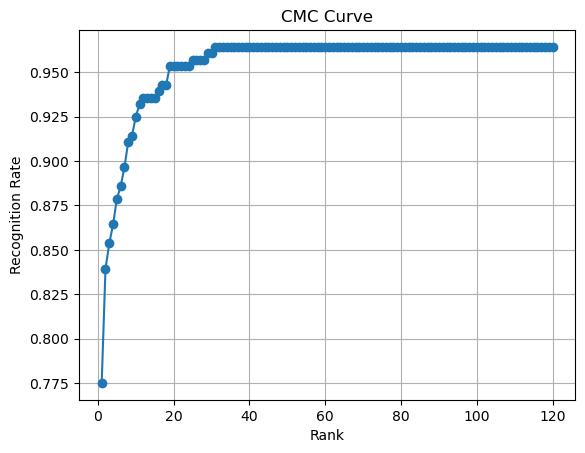

In [18]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply LDA
# Create an LDA object by specifying the number of components
lda = LDA(n_components=min(x_train.shape[1], len(np.unique(y_train)) - 1)) # the equation takes the minimum of the number of features and the number of classes minus 1
x_train_lda = lda.fit_transform(x_train, y_train) # fit_transform() method is used to fit the LDA model and transform the training data
# fit means to train the model on the training data, here the LDA model is trained
x_test_lda = lda.transform(x_test) # transform the test data to the LDA subspace

def calculate_cmc(x_train, y_train, x_test, y_test, metric='euclidean'):
    # Calculate the distance matrix
    dist_matrix = pairwise_distances(x_test, x_train, metric=metric)

    # Get the sorted indices based on distance
    sorted_indices = np.argsort(dist_matrix, axis=1)

    # Initialize the CMC curve
    cmc_curve = np.zeros(len(y_train))

    # Calculate the CMC curve
    for i in range(len(y_test)):
        if sorted_indices[i].size > 0:
            match_indices = np.where(y_train[sorted_indices[i]] == y_test[i])[0]
            if match_indices.size > 0:
                rank = match_indices[0]
                cmc_curve[rank:] += 1
        else:
            print(f"No sorted indices for test sample {i}")

    # Normalize the CMC curve
    cmc_curve = cmc_curve / len(y_test)

    return cmc_curve

def plot_cmc(cmc_curve):
    plt.plot(np.arange(1, len(cmc_curve) + 1), cmc_curve, marker='o')
    plt.xlabel('Rank')
    plt.ylabel('Recognition Rate')
    plt.title('CMC Curve')
    plt.grid(True)
    plt.show()

# Calculate and plot the CMC curve for LDA-transformed data
cmc_curve_lda = calculate_cmc(x_train_lda, y_train, x_test_lda, y_test)
plot_cmc(cmc_curve_lda)

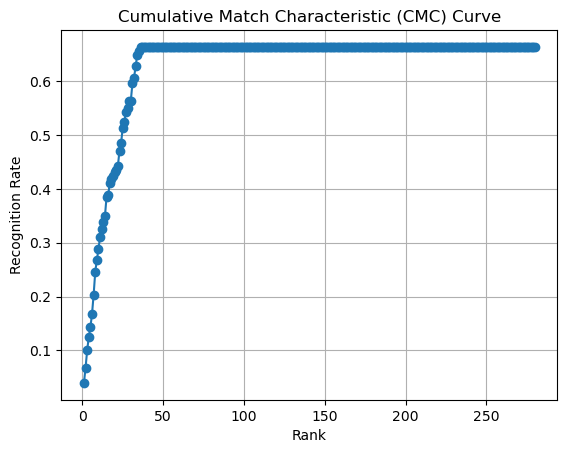

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import pairwise_distances

# Function to calculate the CMC curve
def calculate_cmc(x_train, y_train, decision_scores, y_test):
    sorted_indices = np.argsort(decision_scores, axis=1)[:, ::-1]
    cmc_curve = np.zeros(len(y_test))
    
    for i in range(len(y_test)):
        if i < len(sorted_indices) and sorted_indices[i].size > 0:
            match_indices = np.where(y_train[sorted_indices[i]] == y_test[i])[0]
            if match_indices.size > 0:
                rank = match_indices[0]
                cmc_curve[rank:] += 1
    
    cmc_curve = cmc_curve / len(y_test)
    return cmc_curve

# Function to plot the CMC curve
def plot_cmc(cmc_curve):
    plt.plot(np.arange(1, len(cmc_curve) + 1), cmc_curve, marker='o')
    plt.xlabel('Rank')
    plt.ylabel('Recognition Rate')
    plt.title('Cumulative Match Characteristic (CMC) Curve')
    plt.grid(True)
    plt.show()

# Train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(x_train, y_train)

# Get decision scores for the test data
decision_scores = svm.decision_function(x_test)

# Calculate and plot the CMC curve for SVM
cmc_curve_svm = calculate_cmc(x_train, y_train, decision_scores, y_test)
plot_cmc(cmc_curve_svm)

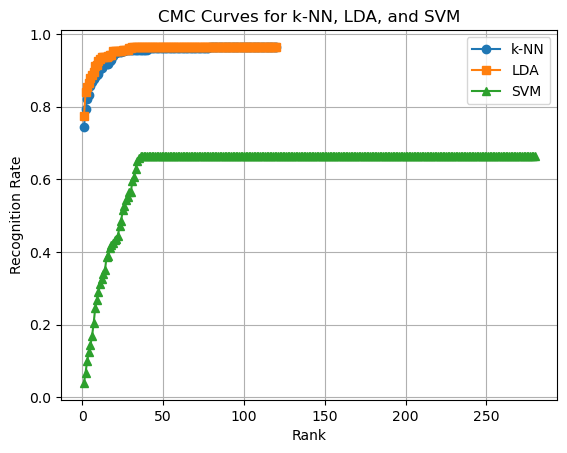

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import pairwise_distances

def calculate_cmc(x_train, y_train, x_test, y_test, metric='euclidean'):
    dist_matrix = pairwise_distances(x_test, x_train, metric=metric)
    sorted_indices = np.argsort(dist_matrix, axis=1)
    cmc_curve = np.zeros(len(y_train))
    for i in range(len(y_test)):
        if sorted_indices[i].size > 0:
            match_indices = np.where(y_train[sorted_indices[i]] == y_test[i])[0]
            if match_indices.size > 0:
                rank = match_indices[0]
                cmc_curve[rank:] += 1
    cmc_curve = cmc_curve / len(y_test)
    return cmc_curve

def plot_cmc_curves(x_train, y_train, x_test, y_test):
    # Baseline k-NN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_train, y_train)
    cmc_curve_knn = calculate_cmc(x_train, y_train, x_test, y_test)

    # LDA
    lda = LDA(n_components=min(x_train.shape[1], len(np.unique(y_train)) - 1))
    x_train_lda = lda.fit_transform(x_train, y_train)
    x_test_lda = lda.transform(x_test)
    cmc_curve_lda = calculate_cmc(x_train_lda, y_train, x_test_lda, y_test)

    # SVM
    svm = SVC(kernel='linear', probability=True)
    svm.fit(x_train, y_train)
    decision_scores = svm.decision_function(x_test)
    sorted_indices_svm = np.argsort(decision_scores, axis=1)[:, ::-1]
    cmc_curve_svm = np.zeros(len(y_test))
    for i in range(len(y_test)):
        if i < len(sorted_indices_svm) and sorted_indices_svm[i].size > 0:
            match_indices = np.where(y_train[sorted_indices_svm[i]] == y_test[i])[0]
            if match_indices.size > 0:
                rank = match_indices[0]
                cmc_curve_svm[rank:] += 1
    cmc_curve_svm = cmc_curve_svm / len(y_test)

    # Plot all CMC curves
    plt.plot(np.arange(1, len(cmc_curve_knn) + 1), cmc_curve_knn, marker='o', label='k-NN')
    plt.plot(np.arange(1, len(cmc_curve_lda) + 1), cmc_curve_lda, marker='s', label='LDA')
    plt.plot(np.arange(1, len(cmc_curve_svm) + 1), cmc_curve_svm, marker='^', label='SVM')
    plt.xlabel('Rank')
    plt.ylabel('Recognition Rate')
    plt.title('CMC Curves for k-NN, LDA, and SVM')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_cmc_curves(x_train, y_train, x_test, y_test)